___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [9]:
os.chdir('C:/Users/ismai/Downloads/machine learning hws/cement slump')
df = pd.read_csv("cement_slump.csv")
df.head()

,Cement,Slag,Fly ash,Water,SP,Coarse Aggr.,Fine Aggr.,SLUMP(cm),FLOW(cm),Compressive Strength (28-day)(Mpa)
0,273.000,82.000,105.000,210.000,9.000,904.000,680.000,23.000,62.000,34.990
1,163.000,149.000,191.000,180.000,12.000,843.000,746.000,0.000,20.000,41.140
2,162.000,148.000,191.000,179.000,16.000,840.000,743.000,1.000,20.000,41.810
3,162.000,148.000,190.000,179.000,19.000,838.000,741.000,3.000,21.500,42.080
4,154.000,112.000,144.000,220.000,10.000,923.000,658.000,20.000,64.000,26.820


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [11]:
df.duplicated().sum()

0

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cement,103.000,229.894,78.877,137.000,152.000,248.000,303.900,374.000
Slag,103.000,77.974,60.461,0.000,0.050,100.000,125.000,193.000
Fly ash,103.000,149.015,85.418,0.000,115.500,164.000,235.950,260.000
Water,103.000,197.168,20.208,160.000,180.000,196.000,209.500,240.000
SP,103.000,8.540,2.808,4.400,6.000,8.000,10.000,19.000
Coarse Aggr.,103.000,883.979,88.391,708.000,819.500,879.000,952.800,1049.900
Fine Aggr.,103.000,739.605,63.342,640.600,684.500,742.700,788.000,902.000
SLUMP(cm),103.000,18.049,8.751,0.000,14.500,21.500,24.000,29.000
FLOW(cm),103.000,49.611,17.569,20.000,38.500,54.000,63.750,78.000
Compressive Strength (28-day)(Mpa),103.000,36.039,7.837,17.190,30.900,35.520,41.205,58.530


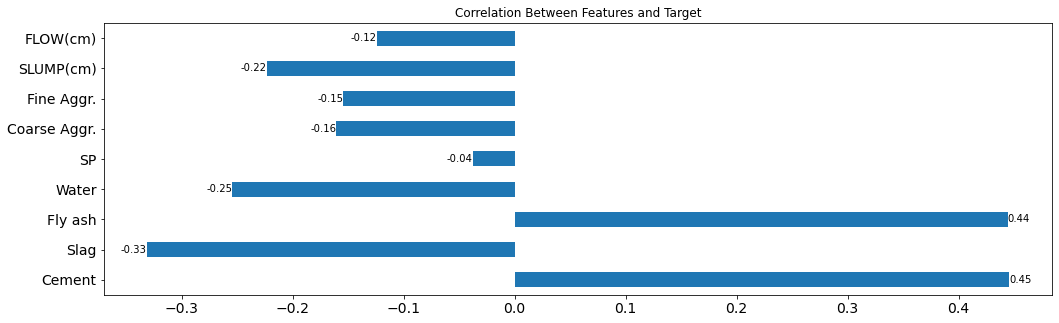

In [13]:
ax = df.corr()['Compressive Strength (28-day)(Mpa)'][:-1].plot(kind ="barh", 
                                                               figsize = (17,5), 
                                                               title ="Correlation Between Features and Target",
                                                               fontsize = 14)
ax.bar_label(ax.containers[0], label_type='edge', fmt ="%.2f");

# EDA and Graphical analysis

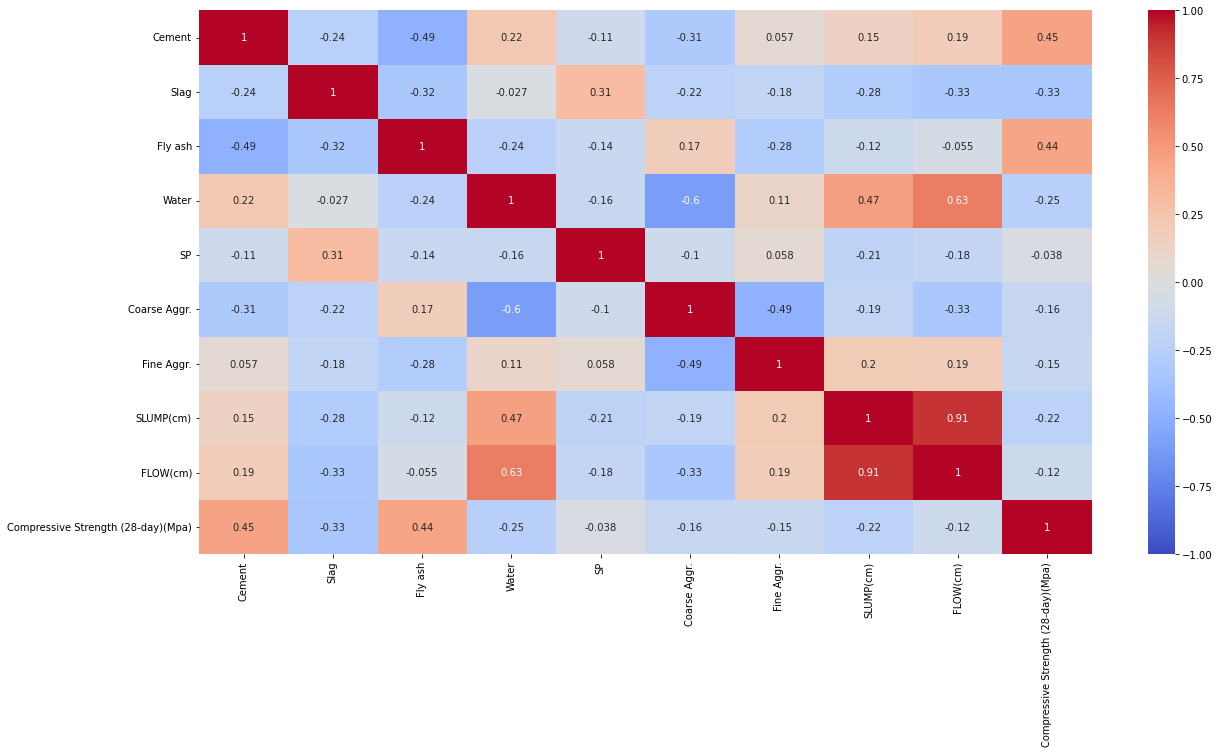

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, cmap= "coolwarm");

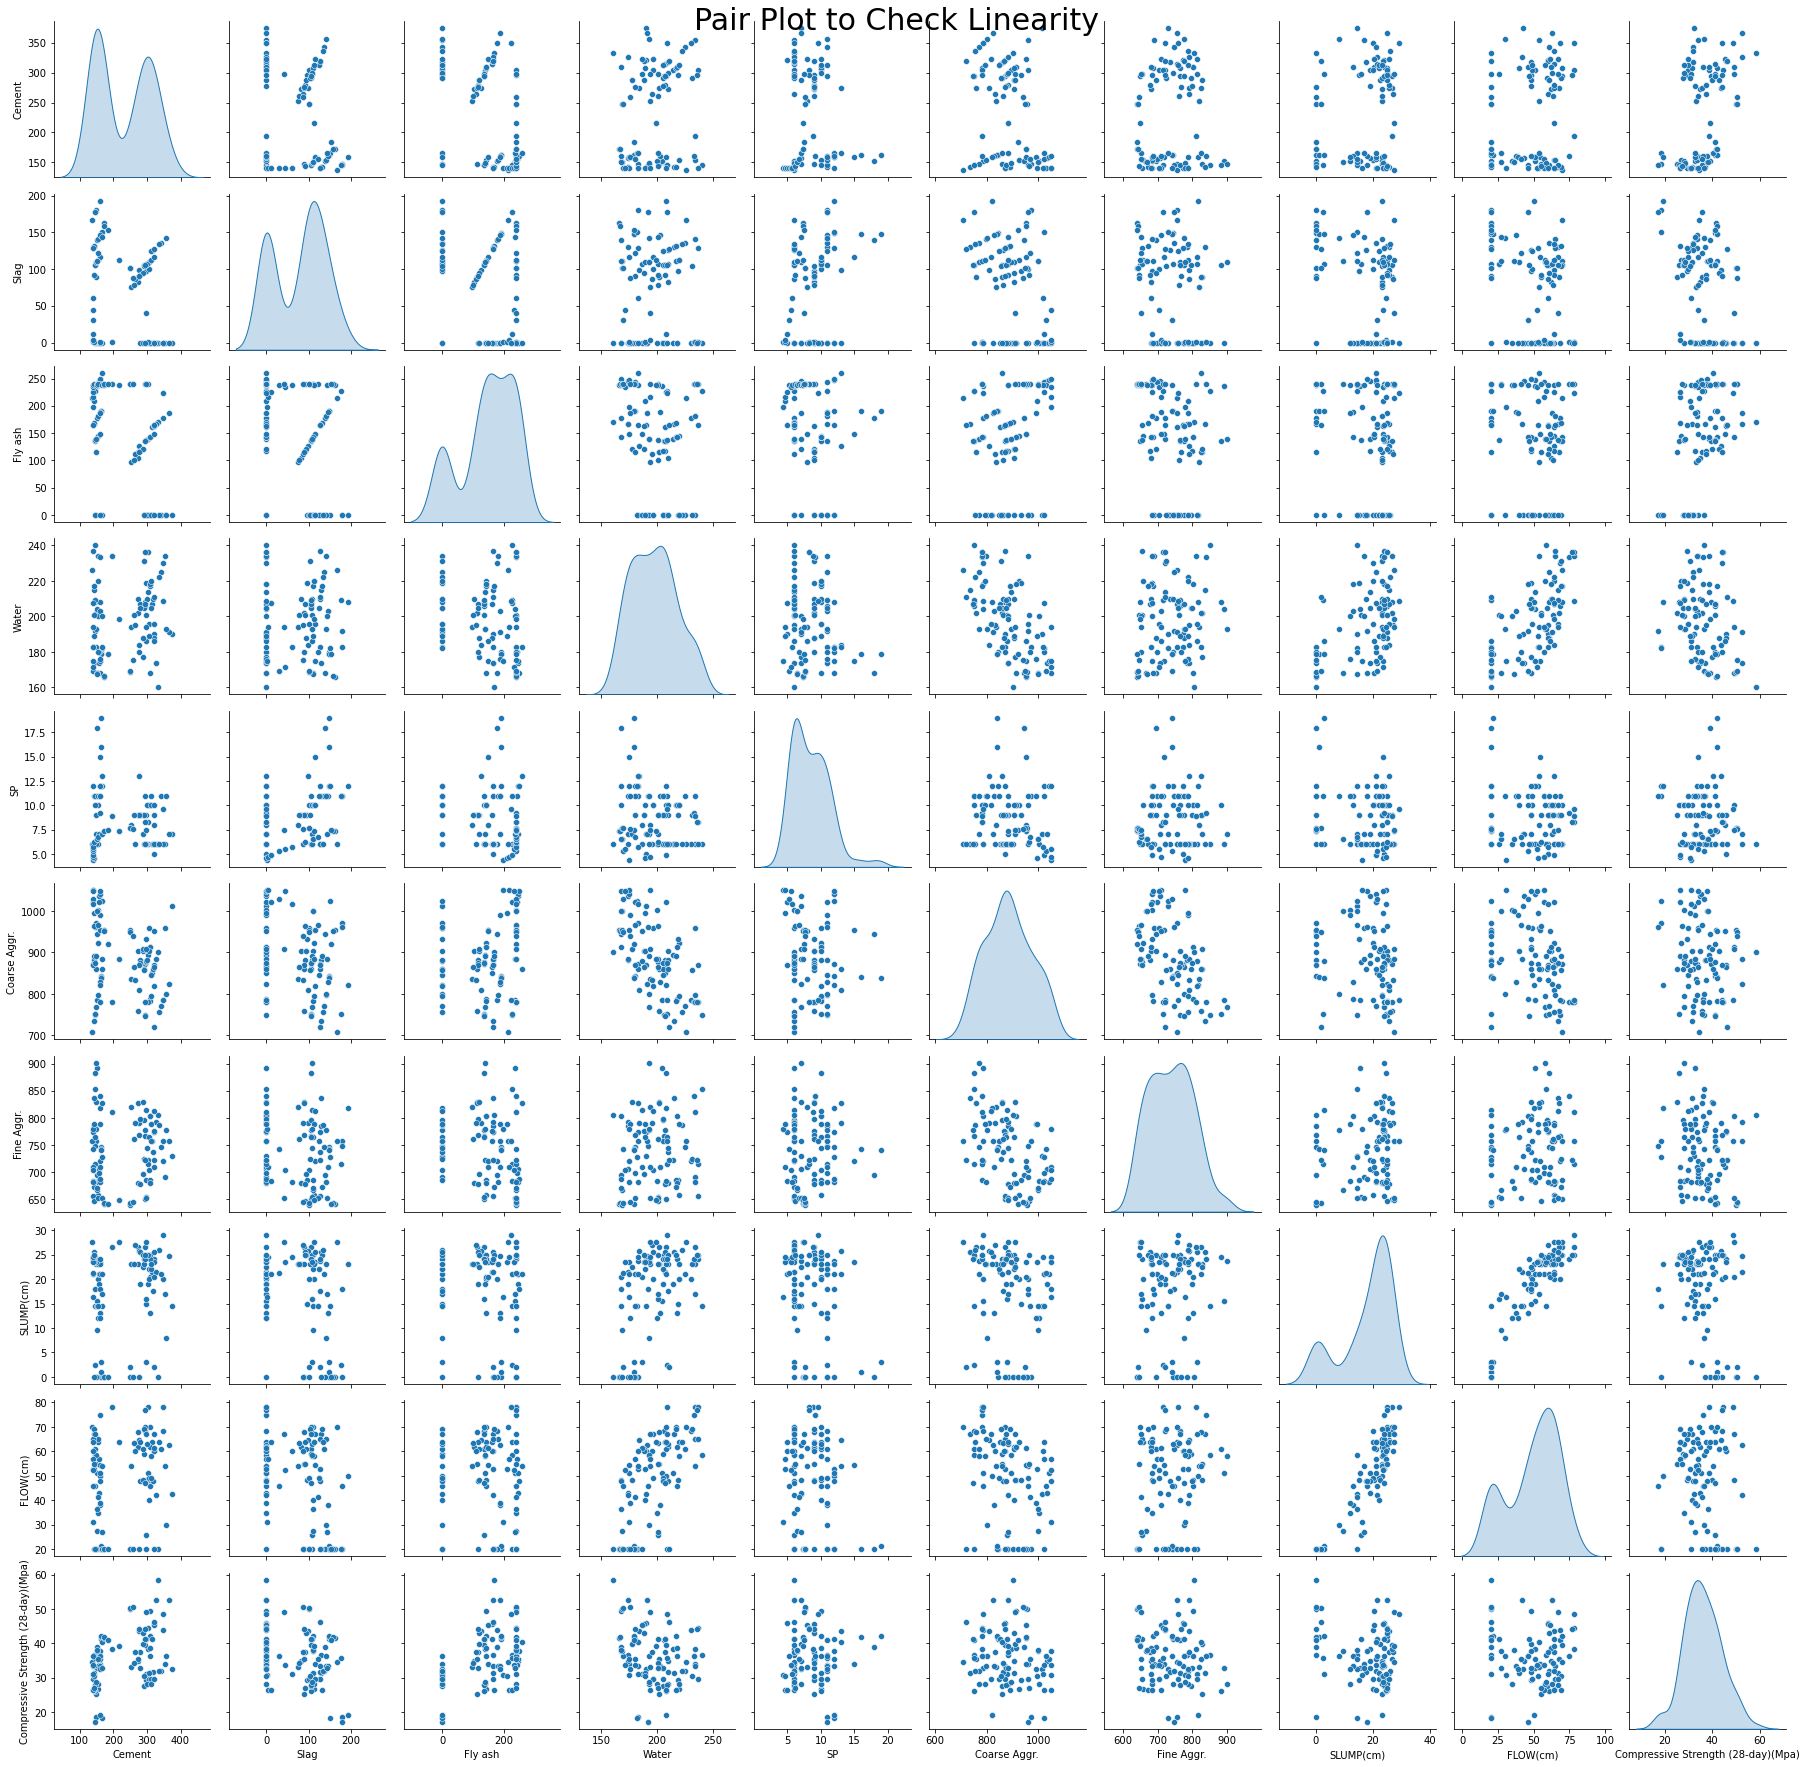

In [15]:
ax = sns.pairplot(df, diag_kind = "kde")
ax.fig.suptitle("Pair Plot to Check Linearity", fontsize = 30,);
plt.tight_layout()

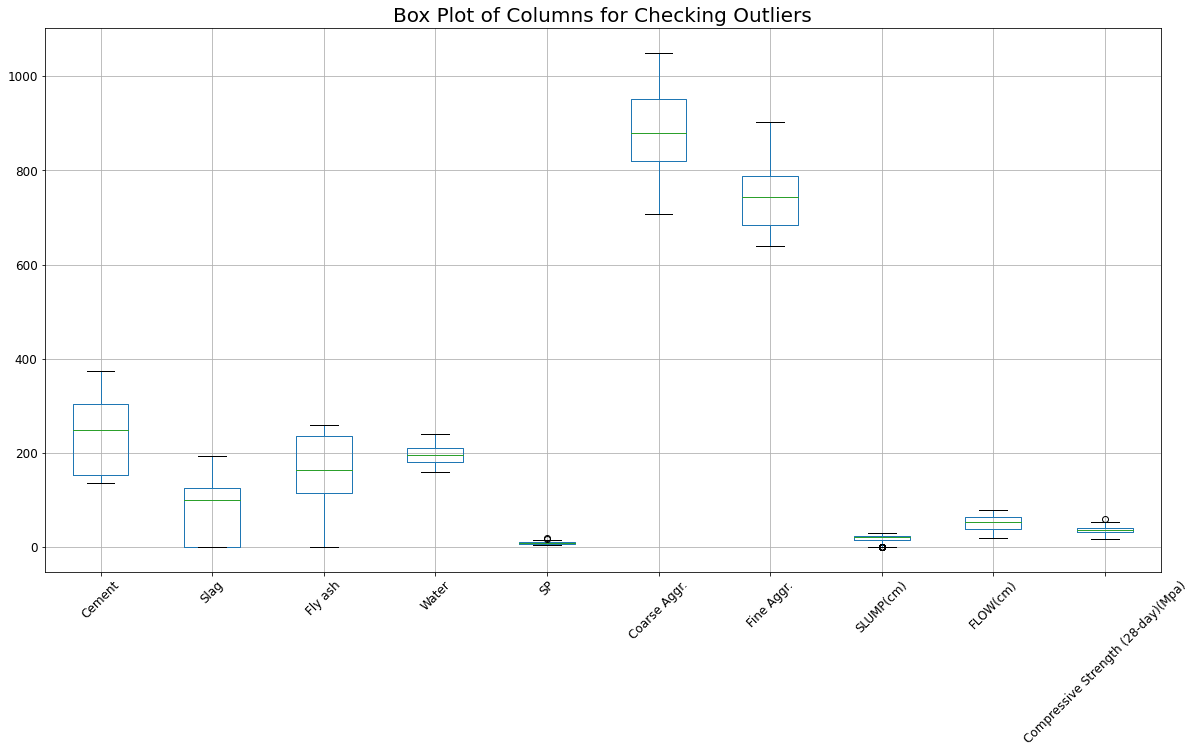

In [16]:
plt.figure(figsize =(20,10))
plt.title("Box Plot of Columns for Checking Outliers", fontdict={'fontsize': 20})
df.boxplot(fontsize = "large", rot = 45);

# Data Preprocessing 

### Features and target variable
* Split the data into features and target variable

In [17]:
X = df.drop("Compressive Strength (28-day)(Mpa)", axis =1)
y = df["Compressive Strength (28-day)(Mpa)"]

### Splitting data into training and testing
* Split the data into training and testing sets

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling
* import StandardScaler and scale the data. Use fit_transform() on the training set and transform() on the testing set to prevent data leakage.

In [20]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [21]:
scaler = StandardScaler()

In [22]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

##  1. Model Building (Linear Regression)
* Build a linear regression model, fit the model, and make predictions on the test and train set, and compare them.

In [23]:
from sklearn.pipeline import Pipeline

In [24]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [25]:
pipe_lm = Pipeline([("scaler", scaler), ("lm", lm)])

In [26]:
pipe_lm.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lm', LinearRegression())])

In [27]:
y_pred = pipe_lm.predict(X_test)
y_train_pred = pipe_lm.predict(X_train)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def train_val(y_train, y_train_pred, y_test, y_pred, model_name):
    
    scores = {model_name+"_train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    model_name+"_test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [29]:
ls =train_val(y_train, y_train_pred, y_test, y_pred, "linear") # train and test scores
ls

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [30]:
from sklearn.model_selection import cross_validate, cross_val_score

In [31]:
model = Pipeline([("scaler", scaler), ("lm", lm)])
scores = cross_validate(model, X_train, y_train, scoring = ['r2', 'neg_mean_absolute_error','neg_mean_squared_error', \
                                                            'neg_root_mean_squared_error'], cv = 5)

In [32]:
pd.DataFrame(scores, index = range(1,6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.013,0.005,0.942,-1.909,-4.645,-2.155
2,0.009,0.006,0.707,-2.647,-10.757,-3.280
3,0.010,0.008,0.866,-1.483,-3.726,-1.930
4,0.012,0.001,0.923,-2.244,-8.434,-2.904
5,0.000,0.016,0.793,-2.868,-11.698,-3.420


In [33]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()

test_r2                             0.846
test_neg_mean_absolute_error       -2.230
test_neg_mean_squared_error        -7.852
test_neg_root_mean_squared_error   -2.738
dtype: float64

In [34]:
train_val(y_train, y_train_pred, y_test, y_pred, "linear")

,linear_train,linear_test
R2,0.907,0.912
mae,1.936,1.740
mse,5.874,4.454
rmse,2.424,2.111


In [35]:
print("train RMSE:", 2.423698/df["Compressive Strength (28-day)(Mpa)"].mean())
print("CV RMSE:", 2.737927/df["Compressive Strength (28-day)(Mpa)"].mean())

train RMSE: 0.06725257718905493
CV RMSE: 0.07597177821060941


In [36]:
pipe_lm["lm"].coef_

array([ 4.28015177, -2.22287954,  3.9320198 , -4.77083923,  0.12109966,
       -5.27729122, -2.61131342, -2.18837804,  1.46570621])

In [37]:
lm_df = pd.DataFrame(pipe_lm["lm"].coef_, columns = ["lm_coef"])
lm_df

,lm_coef
0,4.280
1,-2.223
2,3.932
3,-4.771
4,0.121
5,-5.277
6,-2.611
7,-2.188
8,1.466


# 2. Regularization
* Regularize the model by adding a regularization term to the loss function.

## 2.1 Ridge (Apply and evaluate)
* Build a Ridge regression model, fit the model, and make predictions on the test and train set, and compare them.


In [38]:
from sklearn.linear_model import Ridge

In [39]:
ridge_model = Ridge(alpha=1, random_state=42)


In [40]:
pipe_ridge = Pipeline([("scaler", scaler), ("ridge", ridge_model)])

In [41]:
pipe_ridge.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=1, random_state=42))])

In [42]:
y_pred = pipe_ridge.predict(X_test)
y_train_pred = pipe_ridge.predict(X_train)

In [43]:
rs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge")
rs

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [44]:
pd.concat([ls, rs], axis=1)

,linear_train,linear_test,ridge_train,ridge_test
R2,0.907,0.912,0.906,0.911
mae,1.936,1.740,1.938,1.732
mse,5.874,4.454,5.922,4.493
rmse,2.424,2.111,2.434,2.120


In [45]:
model = Pipeline([("scaler", scaler), ("ridge", ridge_model)])
scores = cross_validate(model, X_train, y_train,
                    scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [46]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.016,0.005,0.945,-1.837,-4.420,-2.102
2,0.006,0.004,0.709,-2.651,-10.681,-3.268
3,0.004,0.004,0.871,-1.488,-3.597,-1.896
4,0.008,0.003,0.921,-2.256,-8.711,-2.951
5,0.005,0.013,0.805,-2.793,-11.033,-3.322


In [47]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                             0.850
test_neg_mean_absolute_error       -2.205
test_neg_mean_squared_error        -7.688
test_neg_root_mean_squared_error   -2.708
dtype: float64

In [48]:
train_val(y_train, y_train_pred, y_test, y_pred, "ridge")

,ridge_train,ridge_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.922,4.493
rmse,2.434,2.120


In [49]:
pipe_ridge["ridge"].coef_

array([ 5.01092233, -1.37765187,  4.8062743 , -3.90644878,  0.26138511,
       -4.06644253, -1.74660531, -1.95498663,  1.13349998])

In [50]:
rm_df = pd.DataFrame(pipe_ridge["ridge"].coef_, columns = ["ridge_coef_1"])

In [51]:
pd.concat([lm_df,rm_df], axis = 1) 

,lm_coef,ridge_coef_1
0,4.280,5.011
1,-2.223,-1.378
2,3.932,4.806
3,-4.771,-3.906
4,0.121,0.261
5,-5.277,-4.066
6,-2.611,-1.747
7,-2.188,-1.955
8,1.466,1.133


In [52]:
from sklearn.linear_model import RidgeCV

In [53]:
alpha_space = np.linspace(0.1, 1, 100)
alpha_space

array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.33636364, 0.34545455, 0.35454545, 0.36363636,
       0.37272727, 0.38181818, 0.39090909, 0.4       , 0.40909091,
       0.41818182, 0.42727273, 0.43636364, 0.44545455, 0.45454545,
       0.46363636, 0.47272727, 0.48181818, 0.49090909, 0.5       ,
       0.50909091, 0.51818182, 0.52727273, 0.53636364, 0.54545455,
       0.55454545, 0.56363636, 0.57272727, 0.58181818, 0.59090909,
       0.6       , 0.60909091, 0.61818182, 0.62727273, 0.63636364,
       0.64545455, 0.65454545, 0.66363636, 0.67272727, 0.68181818,
       0.69090909, 0.7       , 0.70909091, 0.71818182, 0.72727273,
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272

In [54]:
ridge_cv_model = RidgeCV(alphas=alpha_space, cv = 10, scoring= "neg_root_mean_squared_error")

In [55]:
pipe_ridgecv = Pipeline([("scaler", scaler), ("ridgecv", ridge_cv_model)])

In [56]:
pipe_ridgecv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, scoring='neg_root_mean_squared_error'))])

In [57]:
pipe_ridgecv["ridgecv"].alpha_

0.9181818181818181

In [58]:
# Ridge( alpha = 0.91)
y_pred = pipe_ridgecv.predict(X_test)
y_train_pred = pipe_ridgecv.predict(X_train)  

In [59]:
rcs = train_val(y_train, y_train_pred, y_test, y_pred, "ridge_cv") 
rcs

,ridge_cv_train,ridge_cv_test
R2,0.906,0.911
mae,1.938,1.732
mse,5.917,4.485
rmse,2.432,2.118


In [60]:
pd.concat([ls, rs, rcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test
R2,0.907,0.912,0.906,0.911,0.906,0.911
mae,1.936,1.740,1.938,1.732,1.938,1.732
mse,5.874,4.454,5.922,4.493,5.917,4.485
rmse,2.424,2.111,2.434,2.120,2.432,2.118


In [61]:
pipe_ridgecv["ridgecv"].coef_

array([ 5.00521265, -1.38945391,  4.79652108, -3.93170693,  0.25805802,
       -4.09232266, -1.76329842, -1.96996865,  1.15500214])

In [62]:
rcm_df = pd.DataFrame(pipe_ridgecv["ridgecv"].coef_, columns=["ridge_cv_coef_0.91"])

In [63]:
pd.concat([lm_df,rm_df, rcm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91
0,4.280,5.011,5.005
1,-2.223,-1.378,-1.389
2,3.932,4.806,4.797
3,-4.771,-3.906,-3.932
4,0.121,0.261,0.258
5,-5.277,-4.066,-4.092
6,-2.611,-1.747,-1.763
7,-2.188,-1.955,-1.970
8,1.466,1.133,1.155


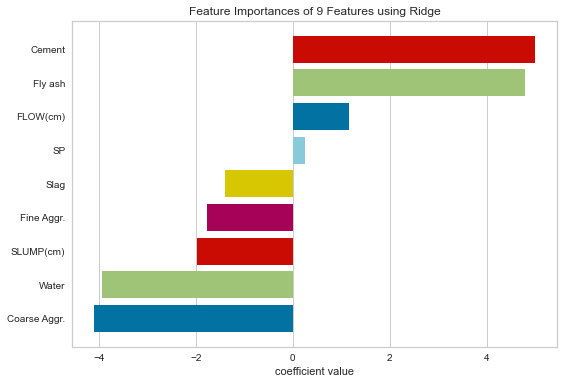

In [112]:
from yellowbrick.model_selection import FeatureImportances 

model = Ridge(alpha=pipe_ridgecv["ridgecv"].alpha_)  # ridge_cv_model.alpha_ = 0.91
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

## 2.2 Lasso (Apply and evalute)
* Build a Lasso regression model, fit the model, and make predictions on the test and train set, and compare them.

In [64]:
from sklearn.linear_model import Lasso, LassoCV

In [65]:
lasso_model = Lasso(alpha=1, random_state=42)

In [66]:
pipe_lasso = Pipeline([("scaler", scaler), ("lasso", lasso_model)])

In [67]:
pipe_lasso.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lasso', Lasso(alpha=1, random_state=42))])

In [68]:
y_pred = pipe_lasso.predict(X_test)
y_train_pred = pipe_lasso.predict(X_train)

In [69]:
lss = train_val(y_train, y_train_pred, y_test, y_pred, "lasso") 
lss

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [70]:
pd.concat([ls, rs, rcs, lss], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168


In [71]:
model = Pipeline([("scaler", scaler), ("lasso", lasso_model)])
scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [72]:
pd.DataFrame(scores, index = range(1, 6))

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.006,0.004,0.826,-3.154,-13.963,-3.737
2,0.006,0.004,0.500,-3.388,-18.345,-4.283
3,0.006,0.003,0.676,-2.382,-8.995,-2.999
4,0.008,0.003,0.682,-4.373,-34.946,-5.912
5,0.011,0.008,0.736,-3.244,-14.906,-3.861


In [73]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:].mean()

test_r2                              0.684
test_neg_mean_absolute_error        -3.308
test_neg_mean_squared_error        -18.231
test_neg_root_mean_squared_error    -4.158
dtype: float64

In [74]:
train_val(y_train, y_train_pred, y_test, y_pred, "lasso")

,lasso_train,lasso_test
R2,0.776,0.802
mae,2.960,2.466
mse,14.144,10.036
rmse,3.761,3.168


In [75]:
model["lasso"].coef_

array([ 4.82131411, -0.        ,  4.88005283, -0.81976891,  0.        ,
       -0.35149513, -0.        , -0.71063068, -0.        ])

In [76]:
lsm_df = pd.DataFrame(model["lasso"].coef_, columns = ["lasso_coef_1"])

In [77]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df], axis = 1) 

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1
0,4.280,5.011,5.005,4.821
1,-2.223,-1.378,-1.389,-0.000
2,3.932,4.806,4.797,4.880
3,-4.771,-3.906,-3.932,-0.820
4,0.121,0.261,0.258,0.000
5,-5.277,-4.066,-4.092,-0.351
6,-2.611,-1.747,-1.763,-0.000
7,-2.188,-1.955,-1.970,-0.711
8,1.466,1.133,1.155,-0.000


In [78]:
lasso_cv_model = LassoCV(alphas = alpha_space, cv = 10, max_iter=100000, random_state=42)

In [79]:
pipe_lassocv = Pipeline([("scaler", scaler), ("lassocv", lasso_cv_model)])

In [80]:
pipe_lassocv.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('lassocv',
                 LassoCV(alphas=array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545, 0.26363636, 0.27272727,
       0.28181818, 0.29090909, 0.3       , 0.30909091, 0.31818182,
       0.32727273, 0.336363...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         cv=10, max_iter=100000, random_state=42))])

In [81]:
pipe_lassocv["lassocv"].alpha_

0.1

In [82]:
# Lasso(alpha =0.1)
y_pred = pipe_lassocv.predict(X_test)   
y_train_pred = pipe_lassocv.predict(X_train)

In [83]:
lcs = train_val(y_train, y_train_pred, y_test, y_pred, "lasso_cv")
lcs

,lasso_cv_train,lasso_cv_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [84]:
pd.concat([ls,rs, rcs, lss, lcs], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158


In [85]:
pipe_lassocv["lassocv"].coef_

array([ 6.36058116,  0.        ,  6.44860782, -2.38557078,  0.46733827,
       -2.09003844, -0.22823288, -1.08177398,  0.        ])

In [86]:
lcm_df = pd.DataFrame(pipe_lassocv["lassocv"].coef_, columns = ["lasso_cv_coef_0.1"])

In [87]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1
0,4.280,5.011,5.005,4.821,6.361
1,-2.223,-1.378,-1.389,-0.000,0.000
2,3.932,4.806,4.797,4.880,6.449
3,-4.771,-3.906,-3.932,-0.820,-2.386
4,0.121,0.261,0.258,0.000,0.467
5,-5.277,-4.066,-4.092,-0.351,-2.090
6,-2.611,-1.747,-1.763,-0.000,-0.228
7,-2.188,-1.955,-1.970,-0.711,-1.082
8,1.466,1.133,1.155,-0.000,0.000


## 2.3 Elastic-Net (Apply and evaluate )

---

* Build an Elastic-Net regression model, fit the model, and make predictions on the test and train set, and compare them.
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV

In [88]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

In [89]:
elastic_model = ElasticNet(alpha=1, l1_ratio=0.5, random_state=42)

In [90]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)])

In [91]:
pipe_elastic.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('elastic', ElasticNet(alpha=1, random_state=42))])

In [92]:
y_pred = pipe_elastic.predict(X_test)
y_train_pred = pipe_elastic.predict(X_train)

In [93]:
es = train_val(y_train, y_train_pred, y_test, y_pred, "elastic")
es

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [94]:
pd.concat([ls,rs, rcs, lss, lcs, es], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297


In [95]:
model = Pipeline([("scaler", scaler), ("elastic", ElasticNet(alpha=1, l1_ratio=0.5, random_state=42))])

scores = cross_validate(model, X_train, y_train,
                        scoring=['r2', 'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv=5)

In [96]:
scores = pd.DataFrame(scores, index = range(1, 6))
scores.iloc[:,2:]

,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
1,0.559,-4.934,-35.413,-5.951
2,0.466,-3.312,-19.562,-4.423
3,0.537,-3.037,-12.860,-3.586
4,0.541,-5.518,-50.401,-7.099
5,0.625,-4.116,-21.178,-4.602


In [97]:
scores = pd.DataFrame(scores, index = range(1, 11))
scores.iloc[:,2:].mean()

test_r2                              0.546
test_neg_mean_absolute_error        -4.183
test_neg_mean_squared_error        -27.883
test_neg_root_mean_squared_error    -5.132
dtype: float64

In [98]:
train_val(y_train, y_train_pred, y_test, y_pred, "elastic")

,elastic_train,elastic_test
R2,0.637,0.635
mae,3.803,3.556
mse,22.982,18.466
rmse,4.794,4.297


In [99]:
pipe_elastic["elastic"].coef_

array([ 2.61657059, -0.73015253,  2.67139945, -1.20195947,  0.        ,
       -1.16386814, -0.32234008, -0.82569551, -0.        ])

In [100]:
em_df = pd.DataFrame(pipe_elastic["elastic"].coef_, columns=["elastic_coef_(alp:1, L1:0.5)"])

In [101]:
pd.concat([lm_df, rm_df, rcm_df, lsm_df, lcm_df, em_df], axis = 1)

,lm_coef,ridge_coef_1,ridge_cv_coef_0.91,lasso_coef_1,lasso_cv_coef_0.1,"elastic_coef_(alp:1, L1:0.5)"
0,4.280,5.011,5.005,4.821,6.361,2.617
1,-2.223,-1.378,-1.389,-0.000,0.000,-0.730
2,3.932,4.806,4.797,4.880,6.449,2.671
3,-4.771,-3.906,-3.932,-0.820,-2.386,-1.202
4,0.121,0.261,0.258,0.000,0.467,0.000
5,-5.277,-4.066,-4.092,-0.351,-2.090,-1.164
6,-2.611,-1.747,-1.763,-0.000,-0.228,-0.322
7,-2.188,-1.955,-1.970,-0.711,-1.082,-0.826
8,1.466,1.133,1.155,-0.000,0.000,-0.000


In [102]:
from sklearn.model_selection import GridSearchCV

In [103]:
elastic_model = ElasticNet(max_iter=10000, random_state=42) 

In [104]:
pipe_elastic = Pipeline([("scaler", scaler), ("elastic", elastic_model)])

In [105]:
param_grid = {"elastic__alpha":alpha_space,
            "elastic__l1_ratio":[0.1, 0.5, 0.7,0.9, 0.95, 1]}

In [106]:
grid_model = GridSearchCV(estimator = pipe_elastic, param_grid = param_grid, scoring = 'neg_root_mean_squared_error',
                         cv =10, verbose =2)

In [107]:
grid_model.fit(X_train, y_train)

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END ..........elastic__alpha=0.1, elast

[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.1090909090909091, elast

[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.1272727272727273, elastic__l

[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.14545454545454545

[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.15454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.16363636363636364, elastic__l1_ratio

[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.17272727272727273, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.1727272727272727

[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.19090909090909092

[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2090909090909091, elastic__l

[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2181818181818182, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.22727272727272727, elastic__l1_ratio=0.1; total

[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.23636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.236363636363636

[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.2545454545454545, elastic__l

[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.26363636363636367, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.2727272727272727, elastic__l1_ratio=

[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.28181818181818186, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.281818181818

[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.3, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__

[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.3181818181818182, elastic__l

[CV] END elastic__alpha=0.32727272727272727, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.33636363636363636, 

[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.34545454545454546, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.345454545454545

[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.36363636363636365

[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.38181818181818183

[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.3909090909090909, elastic__l1_ra

[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.40909090909090906

[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.42727272727272725

[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4363636363636364, elast

[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.4545454545454546, elastic__l

[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.47272727272727266

[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.4818181818181818, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.49090909090909085, elastic__l1_ratio=0.1; total

[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END ..........elastic__alpha=0.5, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__alpha=0.5, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END .........elastic__a

[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5181818181818182, elastic__l

[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5363636363636364, elastic__l

[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5454545454545454, elastic__l1

[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.5636363636363636, elastic__l

[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.5818181818181818, elastic__l

[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.5909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END ..........elastic__alpha=0.6, elastic__l1_ratio=0.1; total time=   0.0

[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.609090909090909, elastic__l1_ratio=1;

[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6272727272727272, elastic__l

[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6454545454545454, elastic__l

[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.6545454545454545, 

[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.6727272727272727, elastic__l

[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.6909090909090908, elastic__l

[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END ............elastic__alpha=0.7, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.709090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic

[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7181818181818181, elastic__l

[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7363636363636363, elastic__l

[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7545454545454545, elastic__l1_ratio=

[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.7636363636363636, elasti

[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.7818181818181817, elastic__l

[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.7999999999999999, elastic__l1_ratio=0.1; tot

[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8090909090909091, el

[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8272727272727273, elastic__l

[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8454545454545453, elastic__l

[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8545454545454545, elastic__l1_ratio=1; total

[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.8727272727272727, elastic__l

[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.8909090909090909, elastic__l

[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.8999999999999999, elastic__l1_ratio=1; to

[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9181818181818181, elastic__l

[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9363636363636363, elastic__l

[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9454545454545454, elastic__l1_ratio

[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.7; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l1_ratio=0.9; total time=   0.0s
[CV] END elastic__alpha=0.9636363636363636, elastic__l

[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.1; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l1_ratio=0.5; total time=   0.0s
[CV] END elastic__alpha=0.9818181818181817, elastic__l

[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=0.95; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; total time=   0.0s
[CV] END elastic__alpha=0.9909090909090909, elastic__l1_ratio=1; to

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('elastic',
                                        ElasticNet(max_iter=10000,
                                                   random_state=42))]),
             param_grid={'elastic__alpha': array([0.1       , 0.10909091, 0.11818182, 0.12727273, 0.13636364,
       0.14545455, 0.15454545, 0.16363636, 0.17272727, 0.18181818,
       0.19090909, 0.2       , 0.20909091, 0.21818182, 0.22727273,
       0.23636364, 0.24545455, 0.25454545,...
       0.73636364, 0.74545455, 0.75454545, 0.76363636, 0.77272727,
       0.78181818, 0.79090909, 0.8       , 0.80909091, 0.81818182,
       0.82727273, 0.83636364, 0.84545455, 0.85454545, 0.86363636,
       0.87272727, 0.88181818, 0.89090909, 0.9       , 0.90909091,
       0.91818182, 0.92727273, 0.93636364, 0.94545455, 0.95454545,
       0.96363636, 0.97272727, 0.98181818, 0.99090909, 1.        ]),
                         'e

In [108]:
grid_model.best_params_

{'elastic__alpha': 0.1, 'elastic__l1_ratio': 1}

In [109]:
y_pred = grid_model.predict(X_test)
y_train_pred = grid_model.predict(X_train)

In [110]:
gm = train_val(y_train, y_train_pred, y_test, y_pred, "elastic_grid")
gm

,elastic_grid_train,elastic_grid_test
R2,0.900,0.908
mae,1.967,1.767
mse,6.295,4.658
rmse,2.509,2.158


In [111]:
pd.concat([ls,rs, rcs, lss, lcs, es, gm], axis = 1)

,linear_train,linear_test,ridge_train,ridge_test,ridge_cv_train,ridge_cv_test,lasso_train,lasso_test,lasso_cv_train,lasso_cv_test,elastic_train,elastic_test,elastic_grid_train,elastic_grid_test
R2,0.907,0.912,0.906,0.911,0.906,0.911,0.776,0.802,0.900,0.908,0.637,0.635,0.900,0.908
mae,1.936,1.740,1.938,1.732,1.938,1.732,2.960,2.466,1.967,1.767,3.803,3.556,1.967,1.767
mse,5.874,4.454,5.922,4.493,5.917,4.485,14.144,10.036,6.295,4.658,22.982,18.466,6.295,4.658
rmse,2.424,2.111,2.434,2.120,2.432,2.118,3.761,3.168,2.509,2.158,4.794,4.297,2.509,2.158


In [113]:
pipe_lassocv["lassocv"].alpha_

0.1

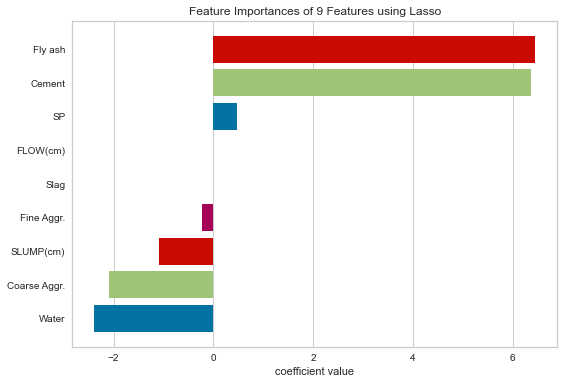

In [114]:
from yellowbrick.model_selection import FeatureImportances

model = Lasso(alpha=pipe_lassocv["lassocv"].alpha_)  # lasso_cv_model.alpha_ = 0.1
viz = FeatureImportances(model,labels=list(X.columns),relative=False)
viz.fit(X_train_scaled,y_train)
viz.show();

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___